# M 221 PageRank Assignment

In [1]:
import numpy as np
import pandas as pd

## Example

First, I'll run through the first example from class. To generate the graphics in this document, I use a package called 'networkx'. It should come along in your Anaconda install. I highlight that you do not need to use this package in this assignment!

You wont have to use it at all, it's just a nice tool for visualization. If you rerun cells, the visualizations might change a bit, but I promise they will all be representing the same graph!

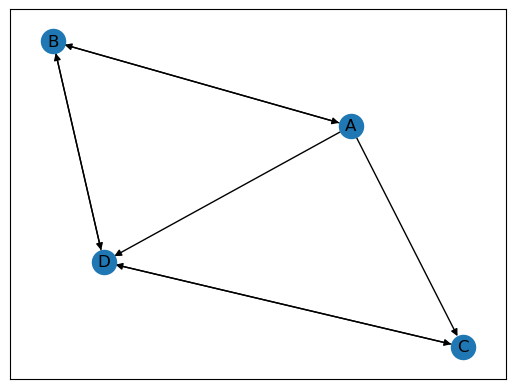

In [2]:
# In this cell I define the graph, it gets drawn in the output:
import networkx as nx

# first define the directed graph: nodes are pages, and (directed) edges indicate links

G = nx.DiGraph()
G.add_nodes_from(['A','B','C','D'])
G.add_edges_from([('A','B'),('A','C'),('A','D'),('B','A'),('B','D'),('C','D'),('D','B'),('D','C')])

# now draw the graph. Re-running this cell will move things around!
nx.draw_networkx(G, arrows=True, with_labels=True)

Here, double-sided arrows indicate a link from one node to the other, and vice-versa. 

For instance, page A is linked to page B and page B is linked to page A.

Below, I define the matrix $L$ as discussed in class. For example, the first column denotes the probability of moving from page A to pages A,B,C,D, in that order.

In [3]:
L = np.array([[0,1/2,0,0],
             [1/3,0,0,1/2],
             [1/3,0,0,1/2],
             [1/3,1/2,1,0]])

L

array([[0.        , 0.5       , 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.5       ],
       [0.33333333, 0.5       , 1.        , 0.        ]])

In [4]:
# this just checks to make sure all the column-sums are equal to 1, as we desire:
np.sum(L,axis=0)

array([1., 1., 1., 1.])

We now define the vector $r_0$: this encodes the scenario in which we have an equal probability of starting at any page in the network:

In [5]:
r_0 = np.array([1/4,1/4,1/4,1/4])

r_0

array([0.25, 0.25, 0.25, 0.25])

*Note: usually, we want $r_0$ to be a column vector. NumPy will let us work with a row vector here, but it's important to keep in mind! It knows that when we ask it to find $Lr_0$, we are thinking of $r_0$ as a column vector. This ties back to our motif of the difference between column and row vectors being sometimes kinda iffy*

Now, we'll use the *Power Method* to find the eigenvector of $L$ corresponding to eigenvalue $1$: we do so by repeatedly multiplying $r_0$ by $L$.

In class, we defined $r_{i+1} = Lr_i$. The syntax we are using below is slightly different, and I want to highlight it: we're going to repeatedly run the same block of code. Each time we do so, we will store $r_{i+1}$ in the place we stored $r_i$. If you would prefer, you may instead rename a new variable each time. This is just easier for copying and pasting, and is just a small syntax trick. Ask me about it if you have any questions!

In [6]:
# first get r_1

r = L.dot(r_0)

#display r_1
r

array([0.125     , 0.20833333, 0.20833333, 0.45833333])

Okay, after one iteration of the power method, we see that the rank of page A has dropped, and the rank of page D has gone up by a lot! Let's iterate a few more times: notice that here is where I reuse a chunk of code:

In [7]:
# find new vector r_{i+1} from r_i
r = L.dot(r)

# display new vector
r

array([0.10416667, 0.27083333, 0.27083333, 0.35416667])

In [8]:
# find new vector r_{i+1} from r_i
r = L.dot(r)

# display new vector
r

array([0.13541667, 0.21180556, 0.21180556, 0.44097222])

In [9]:
# find new vector r_{i+1} from r_i
r = L.dot(r)

# display new vector
r

array([0.10590278, 0.265625  , 0.265625  , 0.36284722])

In [10]:
# find new vector r_{i+1} from r_i
r = L.dot(r)

# display new vector
r

array([0.1328125 , 0.21672454, 0.21672454, 0.43373843])

Okay, let's see what we think is happening here: each component of this vector is bouncing back and forth around a value. It is converging to that value, but it may take a while to do so. To save a bit of space in the notebook, I'm going to run a cell below that contains a *for loop*: this is just something that lets us repeat a task many times. Here, we just multiply $r$ by $L$ $100$ more times:

In [11]:
# multiply r by L, one hundred times

for i in range(100):
    r = L.dot(r)
    
# now display r:
r

array([0.12000085, 0.23999846, 0.23999846, 0.40000223])

Okay, now we're real close to the vector we discussed in class, which was

$$
r_\infty = \begin{bmatrix}0.12\\0.24\\0.24\\0.40  \end{bmatrix}.
$$

The more times you iterate, the closer you should get to this. For our purposes, I'd say we're close enough  :)

We can check that this is correct by checking to see if $r_\infty=Lr_\infty$

In [7]:
r_inf = np.array([0.12,0.24,0.24,0.40])
r_inf

array([0.12, 0.24, 0.24, 0.4 ])

In [13]:
L.dot(r_inf)

array([0.12, 0.24, 0.24, 0.4 ])

Hey, would ya look at that! We've done it! Go us.
****

## Exercise

Below, use the power method to find $r_\infty$ for the provided graph, using the *damping coefficient* of $0.85$:

That is, find $r_\infty$ that is a solution to
$$
r_\infty = 0.85Lr_\infty+0.15r_0
$$

Where $r_0$ is your starting vector.

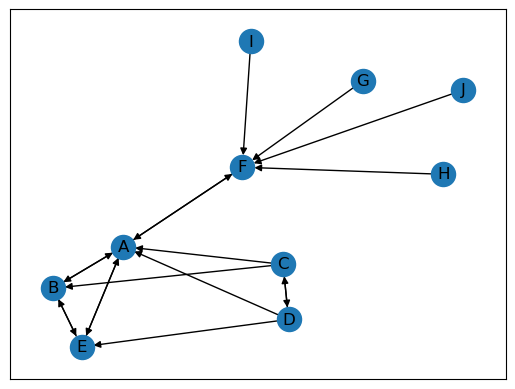

In [8]:
# first we define our graph
G = nx.DiGraph()

G.add_nodes_from(['A','B','C','D','E','F','G','H','I','J'])

G.add_edges_from([('A','B'),('A','E'),('A','F')])
G.add_edges_from([('B','A'),('B','E')])
G.add_edges_from([('C','A'),('C','B'),('C','D')])
G.add_edges_from([('D','A'),('D','C'),('D','E')])
G.add_edges_from([('E','A'),('E','B')])
G.add_edges_from([('F','A')])
G.add_edges_from([('G','F')])
G.add_edges_from([('H','F')])
G.add_edges_from([('I','F')])
G.add_edges_from([('J','F')])

nx.draw_networkx(G, arrows=True, with_labels=True)

In [9]:
# Create L to hold probabilities of going from one page to another (columns sum to 1, had to transpose since I typed it out row by row)
L = np.array([[0, 1/3, 0, 0, 1/3, 1/3, 0, 0, 0, 0], # A
             [1/2, 0, 0, 0, 1/2, 0, 0, 0, 0, 0], # B
             [1/3, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 0], # C
             [1/3, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0], # D
             [1/2, 1/2, 0, 0, 0, 0, 0, 0, 0, 0], # E
             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # F
             [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # G
             [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # H
             [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # I
             [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]) # J
L = L.T
np.sum(L,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
# Create r_0
r_0 = np.array([1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10])

In [11]:
# We can now use the power method to find the steady state vector (using the damping factor of 0.85)
r = r_0
for i in range(1000):
    r = 0.85*L.dot(r) + 0.15*r_0

# Display r
pd.DataFrame(r, index=['A','B','C','D','E','F','G','H','I','J'], columns=['r'])

,r
A,0.334681
B,0.201316
C,0.020930
D,0.020930
E,0.201316
F,0.160826
G,0.015000
H,0.015000
I,0.015000
J,0.015000


In [13]:
sum(r)

1.0000000000000002

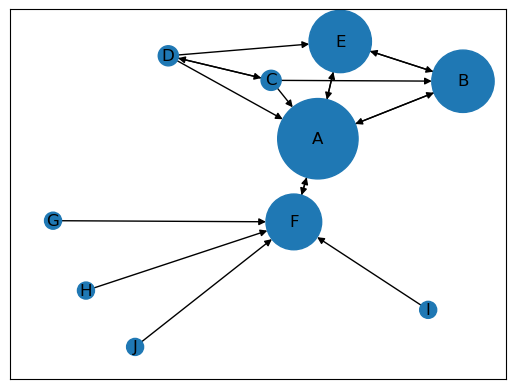

In [16]:
# Show graph with node sizes proportional to r
nx.draw_networkx(G, arrows=True, with_labels=True, node_size=10000*r)